In [33]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set()

In [34]:
# loading dataset
dataset = pd.read_csv("DataSet.csv")

In [35]:
# A summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155295 entries, 0 to 155294
Data columns (total 12 columns):
user_id             155295 non-null object
problem_id          155295 non-null object
level_type          155295 non-null object
attempts_range      155295 non-null int64
submission_count    155295 non-null int64
problem_solved      155295 non-null int64
contribution        155295 non-null int64
country             117442 non-null object
follower_count      155295 non-null int64
max_rating          155295 non-null float64
rating              155295 non-null float64
rank                155295 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.2+ MB


In [36]:
# breif description of the numerical valued feature
dataset.describe()

,attempts_range,submission_count,problem_solved,contribution,follower_count,max_rating,rating
count,155295.000000,155295.000000,155295.000000,155295.000000,155295.000000,155295.000000,155295.000000
mean,1.755028,372.235680,336.078695,5.493718,61.064406,407.525560,368.623667
std,1.078450,398.204943,377.378519,19.076626,258.997551,99.670629,112.046565
min,1.000000,1.000000,1.000000,-64.000000,0.000000,303.899000,0.000000
25%,1.000000,118.000000,99.000000,0.000000,7.000000,323.394000,288.131000
50%,1.000000,237.000000,209.000000,0.000000,20.000000,383.028000,356.078000
75%,2.000000,480.000000,428.000000,1.000000,52.000000,468.463000,445.814000
max,6.000000,4570.000000,4476.000000,171.000000,10575.000000,983.085000,911.124000


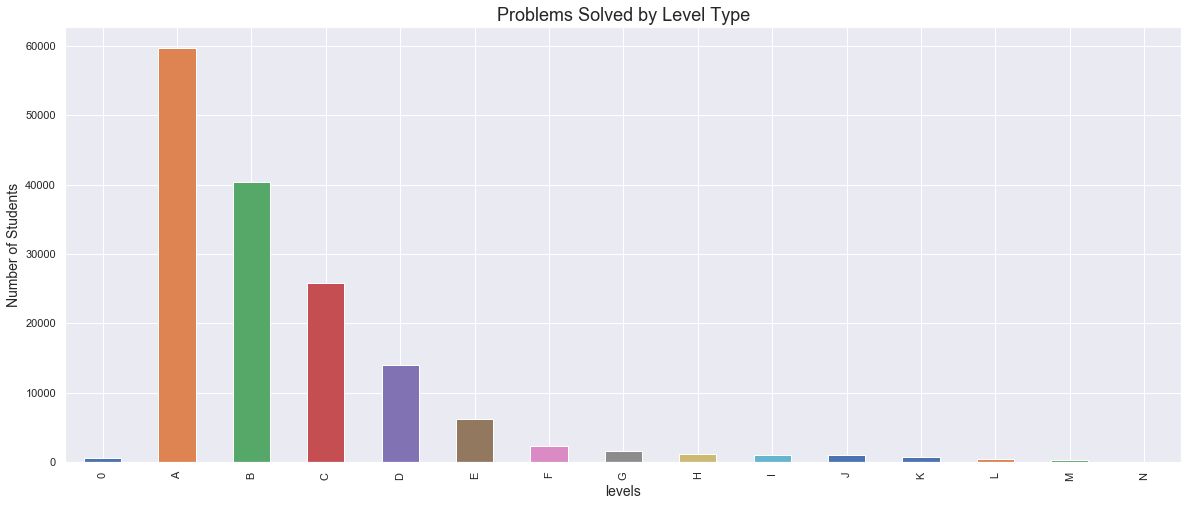

In [37]:
plt.subplots(figsize=(20, 8))
dataset["level_type"].value_counts().sort_index().plot.bar()
plt.title("Problems Solved by Level Type", fontsize=18)
plt.xlabel("levels", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)
plt.show()

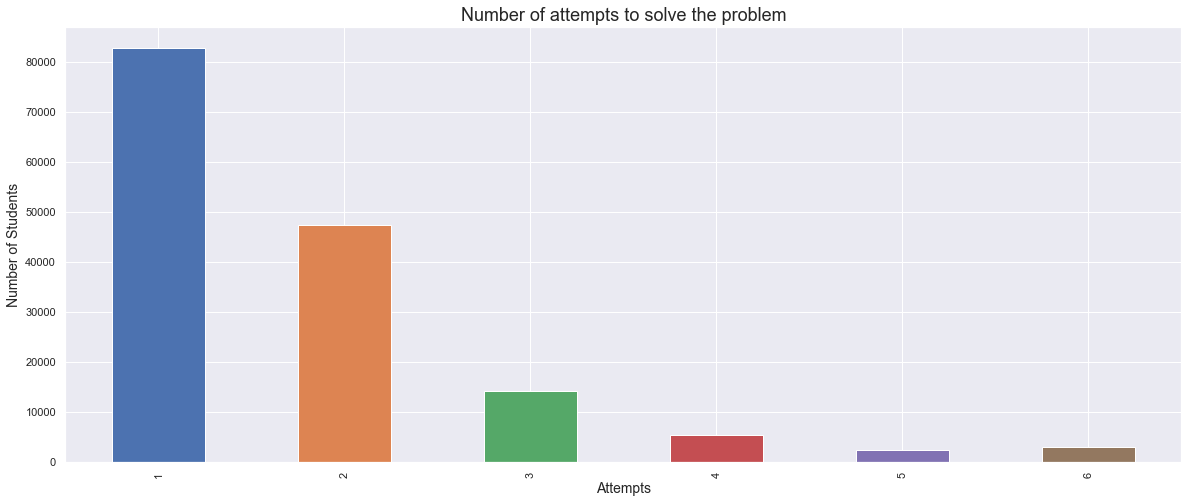

In [38]:
plt.subplots(figsize=(20, 8))
dataset["attempts_range"].value_counts().sort_index().plot.bar()
plt.title("Number of attempts to solve the problem", fontsize=18)
plt.xlabel("Attempts", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)
plt.show()

In [39]:
dataset.groupby("rank").count()

,user_id,problem_id,level_type,attempts_range,submission_count,problem_solved,contribution,country,follower_count,max_rating,rating
rank,,,,,,,,,,,
advanced,30351,30351,30351,30351,30351,30351,30351,27383,30351,30351,30351
beginner,53196,53196,53196,53196,53196,53196,53196,33096,53196,53196,53196
expert,5238,5238,5238,5238,5238,5238,5238,4992,5238,5238,5238
intermediate,66510,66510,66510,66510,66510,66510,66510,51971,66510,66510,66510


In [40]:
def rank_bar(feature, size):
    advanced = dataset[dataset["rank"]=="advanced"][feature].value_counts()
    beginner = dataset[dataset["rank"]=="beginner"][feature].value_counts()
    expert = dataset[dataset["rank"]=="expert"][feature].value_counts()
    intermediate = dataset[dataset["rank"]=="intermediate"][feature].value_counts()
    
    df = pd.DataFrame([beginner, intermediate, advanced, expert])
    df.index = ["beginner","intermediate", "advanced","expert"]
    df.plot(kind='bar',stacked=True, figsize=(size[0], size[1]))

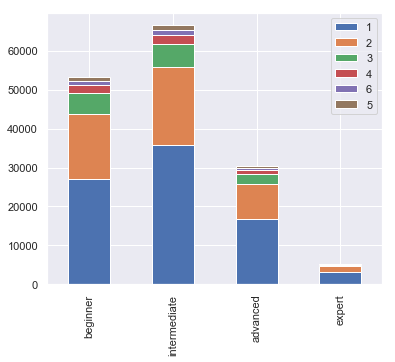

In [41]:
rank_bar("attempts_range",[6,5])

In [42]:
rank_map = {"beginner" : 0, "intermediate" : 1, "advanced" : 2, "expert" : 3, }
dataset["rank"] = dataset["rank"].map(rank_map)

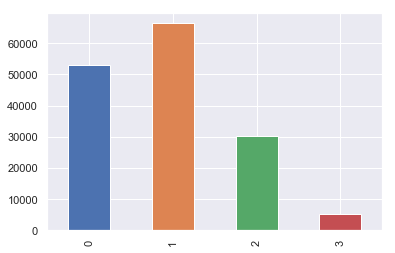

In [43]:
dataset["rank"].value_counts().sort_index().plot.bar()

In [44]:
dataset.corr()

,attempts_range,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank
attempts_range,1.000000,-0.005503,-0.005296,-0.024321,-0.015206,-0.043080,-0.039486,-0.036875
submission_count,-0.005503,1.000000,0.997876,0.439548,0.320270,0.596288,0.546349,0.510493
problem_solved,-0.005296,0.997876,1.000000,0.437941,0.321789,0.596167,0.548583,0.511355
contribution,-0.024321,0.439548,0.437941,1.000000,0.478045,0.550051,0.487090,0.441271
follower_count,-0.015206,0.320270,0.321789,0.478045,1.000000,0.392347,0.342860,0.274167
max_rating,-0.043080,0.596288,0.596167,0.550051,0.392347,1.000000,0.941270,0.890520
rating,-0.039486,0.546349,0.548583,0.487090,0.342860,0.941270,1.000000,0.923126
rank,-0.036875,0.510493,0.511355,0.441271,0.274167,0.890520,0.923126,1.000000


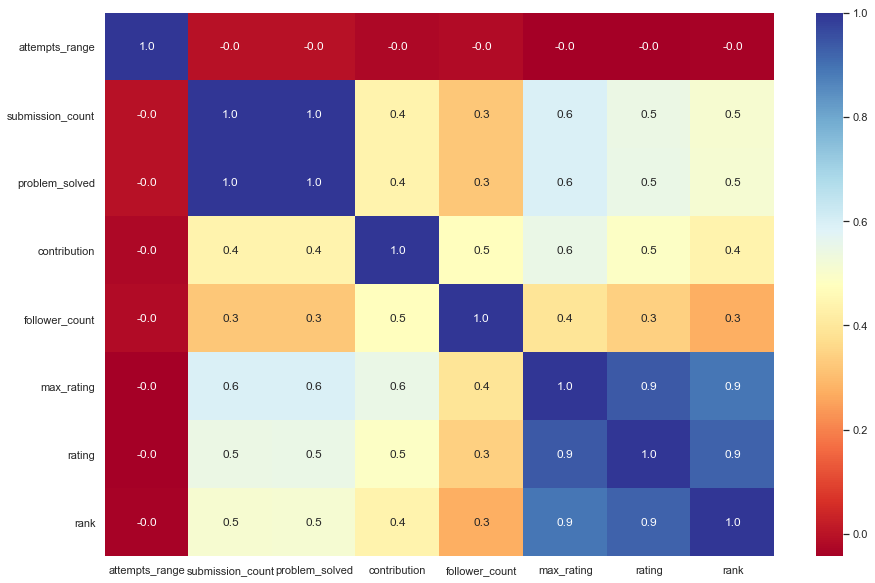

In [45]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(dataset.corr(), annot = True, fmt = ".1f", cmap = "RdYlBu")